In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import xgboost as xgb
sb.set()

def encode(filename):
    data= pd.read_csv(filename)
    data.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

    Attrition_cat=le.fit_transform(data["Attrition"])
    BusinessTravel_cat=le.fit_transform(data["BusinessTravel"])
    Department_cat=le.fit_transform(data["Department"])
    MaritalStatus_cat=le.fit_transform(data["MaritalStatus"])
    OverTime_cat=le.fit_transform(data["OverTime"])

    #fix jobswitchrate and drop less correlated columns
    data_enc=data.copy(deep=True)
    data_enc.replace([np.inf, -np.inf], np.nan, inplace=True)
    data_enc.fillna(0,inplace=True)
    data_enc.drop(columns=['Gender','JobRole','Education','MonthlyIncome','NumCompaniesWorked','YearsWithCurrManager','WorkLifeBalance','YearsSinceLastPromotion','PercentSalaryHike','JobInvolvement','EnvironmentSatisfaction','PerformanceRating','JobInvolvement','TotalWorkingYears','RelationshipSatisfaction','TrainingTimesLastYear','StockOptionLevel','Attrition','BusinessTravel','Department','Gender','JobRole','MaritalStatus', 'OverTime','EducationField','EmployeeNumber','ID'],inplace=True)

    #replace columns
    data_enc["Attrition"]=Attrition_cat
    data_enc["BusinessTravel"]=BusinessTravel_cat
    data_enc["Department"]=Department_cat
    data_enc["MaritalStatus"]=MaritalStatus_cat
    data_enc["OverTime"]=OverTime_cat

    data_att=data_enc["Attrition"].copy()
    data_features=data_enc.drop(columns=["Attrition"])
    
    return data_att,data_features

### Encoding of Categorical Variables

In [2]:
HR_clean = pd.read_csv("IBM.csv")
HR_clean.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
le = preprocessing.LabelEncoder()

Attrition_cat=le.fit_transform(HR_clean["Attrition"])
BusinessTravel_cat=le.fit_transform(HR_clean["BusinessTravel"])
Department_cat=le.fit_transform(HR_clean["Department"])
MaritalStatus_cat=le.fit_transform(HR_clean["MaritalStatus"])
OverTime_cat=le.fit_transform(HR_clean["OverTime"])

#fix jobswitchrate and drop less correlated columns
HR_clean_enc=HR_clean.copy(deep=True)
HR_clean_enc.replace([np.inf, -np.inf], np.nan, inplace=True)
HR_clean_enc.fillna(0,inplace=True)
HR_clean_enc.drop(columns=['Gender','JobRole','Education','MonthlyIncome','NumCompaniesWorked','YearsWithCurrManager','WorkLifeBalance','YearsSinceLastPromotion','PercentSalaryHike','JobInvolvement','EnvironmentSatisfaction','PerformanceRating','JobInvolvement','TotalWorkingYears','RelationshipSatisfaction','TrainingTimesLastYear','StockOptionLevel','Attrition','BusinessTravel','Department','Gender','JobRole','MaritalStatus', 'OverTime','EducationField','EmployeeNumber','ID'],inplace=True)

#replace columns
HR_clean_enc["Attrition"]=Attrition_cat
HR_clean_enc["BusinessTravel"]=BusinessTravel_cat
HR_clean_enc["Department"]=Department_cat
HR_clean_enc["MaritalStatus"]=MaritalStatus_cat
HR_clean_enc["OverTime"]=OverTime_cat

Train,Test=train_test_split(HR_clean_enc, test_size=0.2, random_state=42,stratify=HR_clean_enc["Attrition"])
Train_att=Train["Attrition"].copy()
Train_up=Train.drop(columns=["Attrition"])
Test_att=Test["Attrition"].copy()
Test_up=Test.drop(columns=["Attrition"])

### Regular Decision Tree

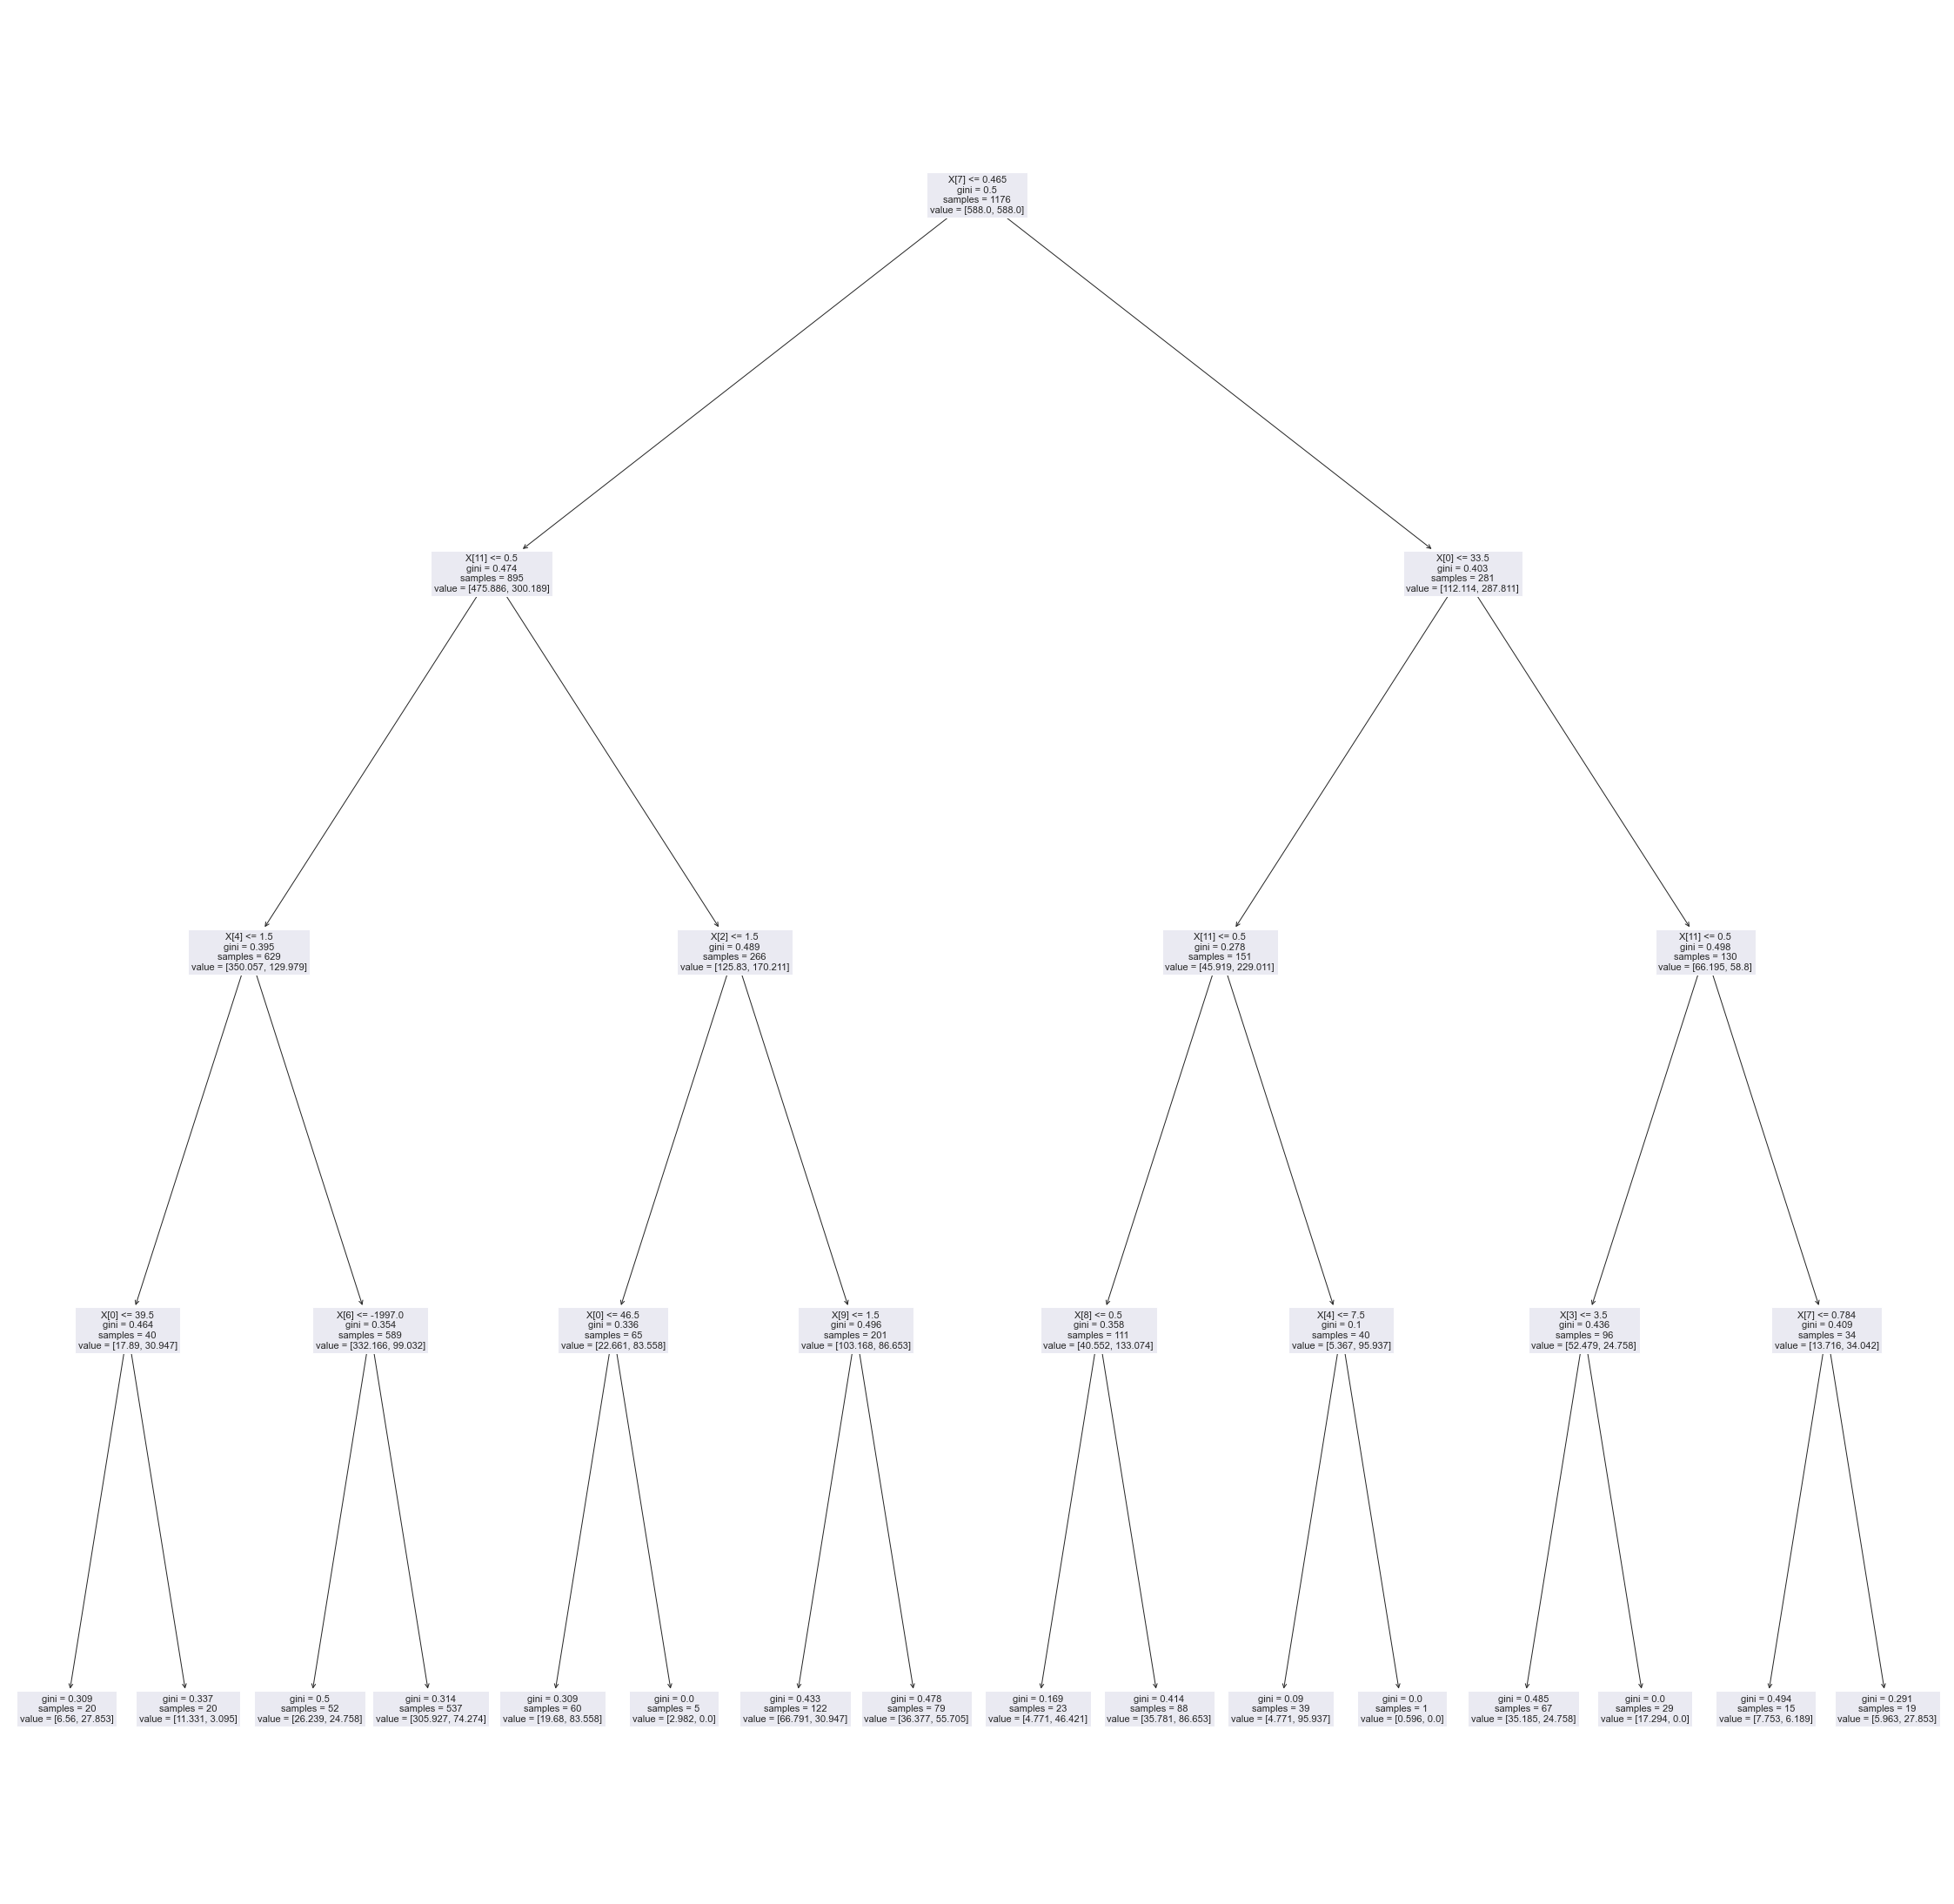


0.7925170068027211
0.7414965986394558


In [3]:
dectree=DecisionTreeClassifier(max_depth=4,class_weight='balanced')
f=plt.figure(figsize=(40,40))
dectree.fit(Train_up,Train_att)
plot_tree(dectree)
plt.show()
print()
print(dectree.score(Train_up,Train_att))
print(dectree.score(Test_up,Test_att))

### Bagging Decision Tree


Accuracy for train set :  0.8690476190476191
Accuracy for test set :  0.8435374149659864


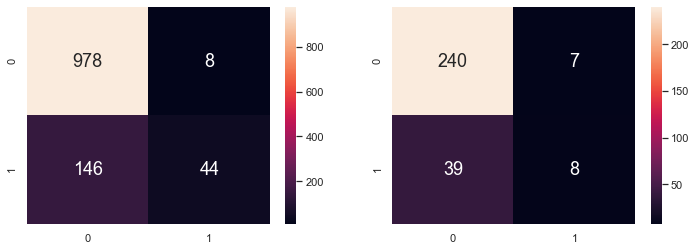

In [4]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                               sampling_strategy='not majority',
                               replacement=True,
                               random_state=42)

f,axes=plt.subplots(1,2,figsize=(12,4))
bbc.fit(Train_up, Train_att)
preds = bbc.predict(Train_up)
cf=confusion_matrix(Train_att, preds)
sb.heatmap(cf,annot=True, fmt=".0f",annot_kws={"size":18},ax=axes[0])
print("Accuracy for train set :  "+ str(bbc.score(Train_up,Train_att)))

test_preds=bbc.predict(Test_up)
cf_test=confusion_matrix(Test_att,test_preds)
sb.heatmap(cf_test,annot=True, fmt=".0f",annot_kws={"size":18},ax=axes[1])
print("Accuracy for test set :  "+ str(bbc.score(Test_up,Test_att)))

## XGBoost

Acuuracy on train set: 0.8843537414965986
Accuracy on test set: 0.8435374149659864


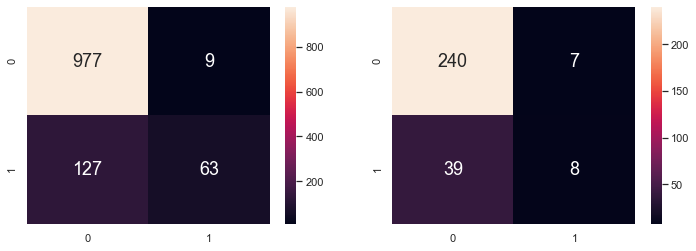

In [5]:
f,axes=plt.subplots(1,2,figsize=(12,4))

xgb_cl=xgb.XGBClassifier(objective='binary:logitraw', max_depth=2,verbosity=0)
xgb_cl.fit(Train_up,Train_att)

xgb_pred_train=xgb_cl.predict(Train_up)
sb.heatmap(confusion_matrix(Train_att, xgb_pred_train),annot=True, fmt=".0f",annot_kws={"size":18},ax=axes[0])
print("Acuuracy on train set: " + str(xgb_cl.score(Train_up,Train_att)))

xgb_pred_test=xgb_cl.predict(Test_up)
sb.heatmap(confusion_matrix(Test_att,xgb_pred_test),annot=True, fmt=".0f",annot_kws={"size":18},ax=axes[1])
print("Accuracy on test set: " + str(xgb_cl.score(Test_up,Test_att)))

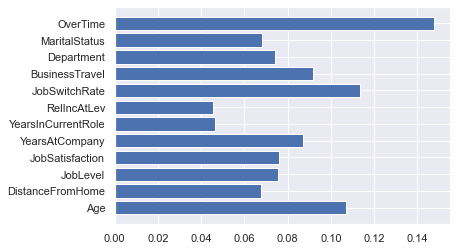

In [6]:
plt.barh(Test_up.columns,xgb_cl.feature_importances_)
print()

### Average Value Encoding

In [7]:
avg_clean_att,avg_clean_features = encode("avg_final.csv")

<AxesSubplot:>

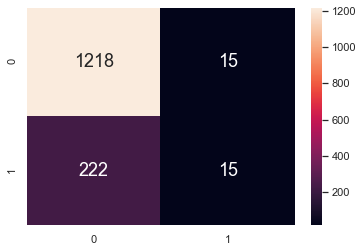

In [8]:
preds = bbc.predict(avg_clean_features)
sb.heatmap(confusion_matrix(avg_clean_att, preds),annot=True, fmt=".0f",annot_kws={"size":18})

<AxesSubplot:>

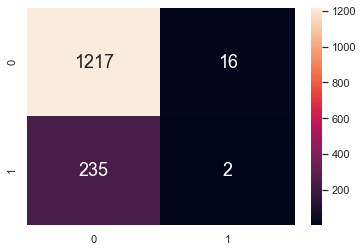

In [9]:
xgb_pred=xgb_cl.predict(avg_clean_features)
sb.heatmap(confusion_matrix(avg_clean_att, xgb_pred),annot=True, fmt=".0f",annot_kws={"size":18})

### Average Value Encoding v2

In [10]:
rel_clean_att,rel_clean_features=encode("rel_avg_final.csv")

<AxesSubplot:>

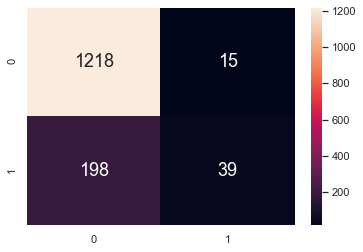

In [11]:
preds = bbc.predict(rel_clean_features)
sb.heatmap(confusion_matrix(rel_clean_att, preds),annot=True, fmt=".0f",annot_kws={"size":18})

<AxesSubplot:>

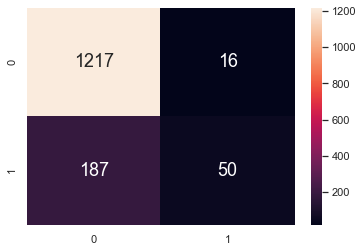

In [12]:
rel_pred=xgb_cl.predict(rel_clean_features)
sb.heatmap(confusion_matrix(rel_clean_att, rel_pred),annot=True, fmt=".0f",annot_kws={"size":18})

### Avg value encoding for data_5

In [13]:
data_5_att,data_5_features=encode("data_5.csv")

<AxesSubplot:>

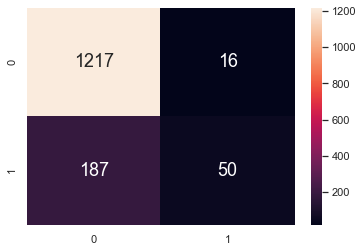

In [14]:
preds = bbc.predict(data_5_features)
sb.heatmap(confusion_matrix(data_5_att, preds),annot=True, fmt=".0f",annot_kws={"size":18})

<AxesSubplot:>

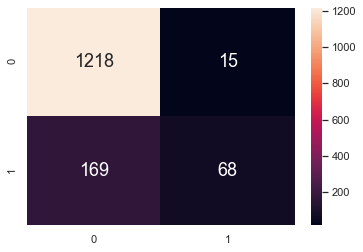

In [15]:
rel_pred=xgb_cl.predict(data_5_features)
sb.heatmap(confusion_matrix(data_5_att, rel_pred),annot=True, fmt=".0f",annot_kws={"size":18})

### Avg value encoding for data_10

In [16]:
data_10_att,data_10_features=encode("data_10.csv")

<AxesSubplot:>

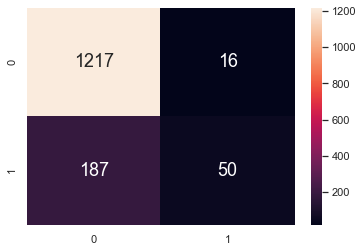

In [17]:
preds = bbc.predict(data_10_features)
sb.heatmap(confusion_matrix(data_10_att, preds),annot=True, fmt=".0f",annot_kws={"size":18})

<AxesSubplot:>

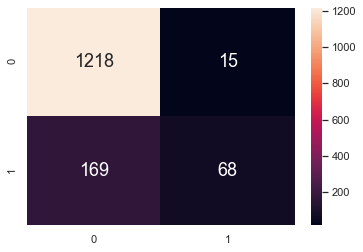

In [18]:
rel_pred=xgb_cl.predict(data_10_features)
sb.heatmap(confusion_matrix(data_10_att, rel_pred),annot=True, fmt=".0f",annot_kws={"size":18})